# HW2 - FARAHI Zubair

In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [2]:
X =  np.genfromtxt("GMM.in")
print(X.shape)
N, D = X.shape
K = 4
X[0][0]

(1000, 2)


-2.203

In [4]:
def read_samples(file_name):
    samples = []
    with open(file_name, "r") as handler:
        lines = handler.readlines()
        for i in range(0, len(lines)):
            sample = [float(v) for v in lines[i].split()]
            samples.append(np.array([[sample[0]], [sample[1]]]))
    return samples


In [5]:
def generate_random_initial_weights(count):
    weights = []
    for i in range(0, count):
        w = []
        p = 1
        for j in range(0, 3):
            val = random.uniform(0, p)
            w.append(val)
            p = p-val
        w.append(p)
        weights.append(w)
    return weights

In [6]:
def compute_Nv(weights, K, N):
    Nv = []
    for k in range(0, K):
        N_k_sum = 0
        for i in range(0, N):
            N_k_sum += weights[i][k]
        Nv.append(N_k_sum)
    return Nv

In [7]:
def compute_alfa(Nv, N, K):
    alfa = []
    for k in range(0, K):
        alfa.append(Nv[k]/N)
    return alfa

In [8]:
def compute_miu(Nv, weights, samples, K, N):
    miu = []
    for k in range(0, K):
        miu_k = np.array([[0], [0]]).astype(np.float64)
        for i in range(0, N):
            miu_k += weights[i][k] * samples[i]
        miu.append((1/Nv[k]) * miu_k)
    return miu

In [9]:
def compute_sigma(Nv, weights, samples, miu, K, N):
    sigma = []
    for k in range(0, K):
        sigma_k = np.array([[0, 0], [0, 0]]).astype(np.float64)
        for i in range(0, N):  
            sigma_k += weights[i][k] * (np.outer(samples[i] - miu[k], (samples[i] - miu[k]).transpose()))
        sigma.append((1/Nv[k]) * sigma_k)
    return sigma  

In [10]:
def M_step(weights, K, N, samples):
    Nv = compute_Nv(weights, K, N)
    alfa = compute_alfa(Nv, N, K)
    miu = compute_miu(Nv, weights, samples, K, N)
    sigma = compute_sigma(Nv, weights, samples, miu, K, N)
    return (Nv, alfa, miu, sigma)

In [11]:
def compute_p_k_for_sample(sample, miu_k, sigma_k, d):
    upper_term = np.exp((-1/2) * np.dot(np.dot((sample - miu_k).transpose(), np.linalg.inv(sigma_k)), (sample - miu_k)))
    lower_term = np.power((2 * np.pi), d/2) *  math.sqrt(abs(np.linalg.det(sigma_k)))
    p_k_sample = upper_term[0][0] / lower_term
    return p_k_sample

In [12]:
def E_step(samples, alfa, K, sigma, miu, d, N):
    weights = []
    for i in range(0, N):
        w = []
        lower_term = 0
        for m in range(0, K):
            lower_term += compute_p_k_for_sample(samples[i], miu[m], sigma[m], d) * alfa[m]

        for k in range(0, K):
            w.append((compute_p_k_for_sample(samples[i], miu[k], sigma[k], d) * alfa[k]) / lower_term)

        weights.append(w)
    return weights

In [13]:
def log_likelihood(K, N, samples, alfa, sigma, miu, d):
    current_log_likelihood = 0

    for i in range(0, N):
        log_sum = 0
        for k in range(0, K):
            log_sum += alfa[k] * compute_p_k_for_sample(samples[i], miu[k], sigma[k], d)
        log_sum = np.log(log_sum)
        current_log_likelihood += log_sum

    return current_log_likelihood

In [14]:
def convergence(previous_log_likelihood, current_log_likelihood, epsilon):
    if abs(current_log_likelihood - previous_log_likelihood) < epsilon:
        return True
    return False

In [15]:
def make_plot(plot_title, samples, result):
    colors_dict = {0: 'g.', 1: 'r.', 2: 'b.', 3: 'y.'}
    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(1, 1)
    ax2 = plt.subplot(G[0, :])

    for i in range(0, len(result)):
        ax2.plot(samples[i][0][0], samples[i][1][0], colors_dict[result[i]], alpha=0.3)
    ax2.set_title(plot_title)
    plt.tight_layout()
    plt.show()

In [16]:
def get_final_result(samples, miu, sigma, d, N, K):
    result = []

    for i in range(0, N):
        max_p = 0.0
        choice = 0
        for k in range(0, K):
            p_k_sample = compute_p_k_for_sample(samples[i], miu[k], sigma[k], d)
            if p_k_sample > max_p:
                max_p = p_k_sample
                choice = k
        result.append(choice)
    return result

# The results can be seen it is more close to result ouput

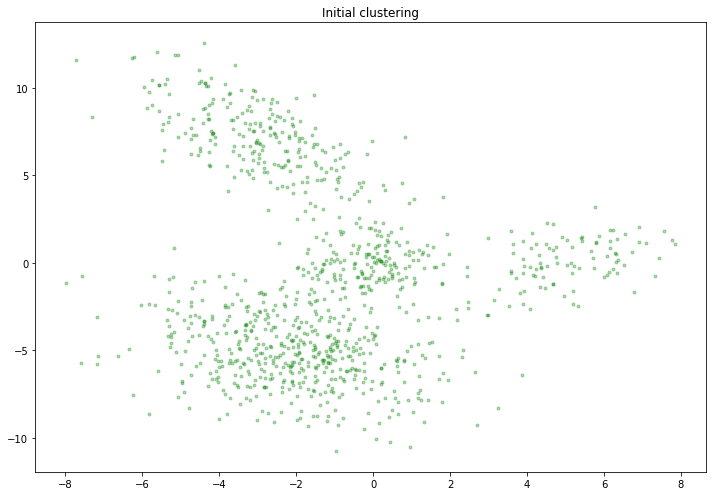

-5511.87498360487
-5498.306935928102
-5455.74784212288
-5375.483908598774
-5310.840676275509
-5286.2216812084225
-5270.077585663935
-5251.487624636218
-5226.928844997889
-5194.439056945813
-5153.385163621092
-5109.226649306809
-5079.388420905838
-5063.684368980265
-5051.114820716361
-5037.916767483619
-5024.207323619705
-5011.649284517466
-5001.673256718064
-4994.0050832697825
-4987.422057702094
-4981.199838329424
-4975.354445559357
-4970.326452730407
-4966.428141124837
-4963.43900559844
-4960.874848572319
-4958.437997403261
-4956.073024329044
-4953.819742606052
-4951.717944956504
-4949.7859741558605
-4948.015976553384
-4946.361289351039
-4944.736269383725
-4943.035143357214
-4941.149171667232
-4938.975464167263
-4936.431691793051
-4933.498597396566
-4930.305360426076
-4927.217905899684
-4924.763741097761
-4923.262262260605
-4922.557387746106
-4922.284162020743
-4922.188476096145
-4922.1563322532875
-4922.145626498078
-4922.142020376738
-4922.1407748633565
-4922.140329313873
[0, 0, 0, 

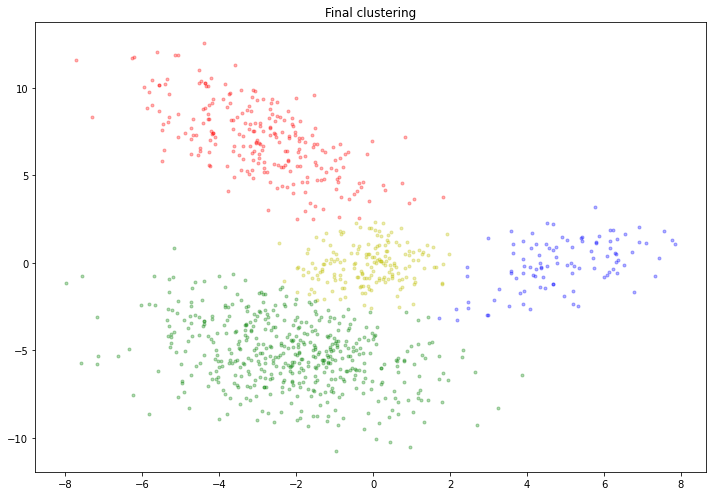

alfa = [0.4945118662773324, 0.2429842868119087, 0.09951139636488887, 0.1629924505458696]
miu =  [array([[-2.10287941],
       [-5.12502179]]), array([[-2.85808818],
       [ 6.93409823]]), array([[ 4.93394078],
       [-0.02849207]]), array([[-0.09921931],
       [-0.0631105 ]])]
sigma =  [array([[ 3.68834053, -1.10756663],
       [-1.10756663,  4.05869873]]), array([[ 2.68203208, -2.43776195],
       [-2.43776195,  4.84580121]]), array([[1.82845863, 0.86043548],
       [0.86043548, 1.89102849]]), array([[0.87377065, 0.10154453],
       [0.10154453, 1.12173264]])]


In [17]:
    samples = read_samples("GMM.in")
    
    make_plot("Initial clustering", samples, len(samples) * [0])

    d = 2
    K = 4
    N = len(samples)
    weights = generate_random_initial_weights(len(samples)) #N vectors of 4 elements each
    Nv = [] #a vector of 4 elements
    alfa = [] #a vector of 4 elements
    miu = [] #a vector of 4 elements containing 2 element vectors
    sigma = [] #a vector of 4 elements containing 2x2 matrices

    (Nv, alfa, miu, sigma) = M_step(weights, K, N, samples)
    epsilon = 0.001

    current_log_likelihood = log_likelihood(K, N, samples, alfa, sigma, miu, d)
    previous_log_likelihood = current_log_likelihood + 2 * epsilon

    while not convergence(previous_log_likelihood, current_log_likelihood, epsilon):
        weights = E_step(samples, alfa, K, sigma, miu, d, N)
        (Nv, alfa, miu, sigma) = M_step(weights, K, N, samples)
        previous_log_likelihood = current_log_likelihood
        current_log_likelihood = log_likelihood(K, N, samples, alfa, sigma, miu, d)
        print(current_log_likelihood)



    result_assignment = get_final_result(samples, miu, sigma, d, N, K)
    print(result_assignment)
    make_plot("Final clustering", samples, result_assignment)

    print("alfa =", alfa)
    print("miu = ", miu)
    print("sigma = ", sigma)